# Imports

In [12]:
import numpy   as np
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Load data

In [13]:
df = pd.read_csv('sales_train.csv')


In [14]:
df_test = pd.read_csv('test.csv', index_col='ID')
df_items = pd.read_csv('items.csv', index_col='item_id')
df_categories = pd.read_csv('categories.csv', index_col='category_id')
df_shops = pd.read_csv('shops.csv', index_col='shop_id')
df_sub =  pd.read_csv('sample_submission.csv',index_col='ID')

In [15]:
df_items # add category id to item id
df_categories # add for categorical

,category_name
category_id,
0,PC - Headsets / Headphones
1,Accessories - PS2
2,Accessories - PS3
3,Accessories - PS4
4,Accessories - PSP
...,...
79,Service
80,Service - Tickets
81,Blank media (spire)


In [16]:
df_sub.item_cnt_month = 99
df_sub

,item_cnt_month
ID,
0,99
1,99
2,99
3,99
4,99
...,...
214195,99
214196,99
214197,99


In [17]:
display(df)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [18]:
df_test

,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268
...,...,...
214195,45,18454
214196,45,16188
214197,45,15757


# EDA

Outlier: Sales with a lot of quatities

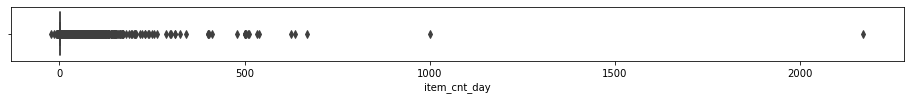

In [19]:
plt.figure(figsize=(16,1))
sb.boxplot(x=df.item_cnt_day);

Outlier: Sales with a expensive items

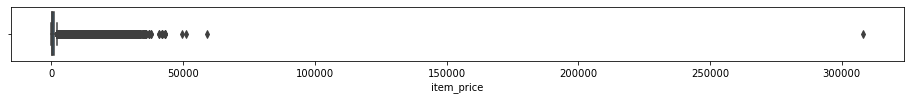

In [20]:
plt.figure(figsize=(16,1))
sb.boxplot(x=df.item_price);

Negative prices -> Refunds

In [21]:
df.loc[df.item_price<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


# Filter to obtain only the sales from Octuber 2015: date_block_num==33

In [23]:
df_33 = df.loc[df['date_block_num']==33]
df_33

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2882335,23.10.2015,33,45,13315,649.0,1.0
2882336,05.10.2015,33,45,13880,229.0,1.0
2882337,02.10.2015,33,45,13881,659.0,1.0
2882338,12.10.2015,33,45,13881,659.0,1.0
2882339,04.10.2015,33,45,13923,169.0,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.0,1.0
2935845,09.10.2015,33,25,7460,299.0,1.0
2935846,14.10.2015,33,25,7459,349.0,1.0
2935847,22.10.2015,33,25,7440,299.0,1.0


In [25]:
df_33.shop_id.nunique() # There are 44 of 60 shops on this month

44

In [26]:
df_33.item_id.nunique() # There are 5413 of 22170 items on this month

5413

# Do some aggregation to convert from day detail to month detail: groupby

In [27]:
df_33.groupby(["shop_id", "item_id"])[["item_cnt_day"]].agg(["min", "max", "mean", "count", "sum"])

item_cnt_day                     
                         min  max mean count  sum
shop_id item_id                                  
2       31               1.0  1.0  1.0     1  1.0
        486              1.0  1.0  1.0     3  3.0
        787              1.0  1.0  1.0     1  1.0
        794              1.0  1.0  1.0     1  1.0
        968              1.0  1.0  1.0     1  1.0
...                      ...  ...  ...   ...  ...
59      22087            1.0  3.0  2.0     3  6.0
        22088            1.0  1.0  1.0     2  2.0
        22091            1.0  1.0  1.0     1  1.0
        22100            1.0  1.0  1.0     1  1.0
        22102            1.0  1.0  1.0     1  1.0

[31531 rows x 5 columns]

In [28]:
df_33_agg = df_33.groupby(["shop_id", "item_id"])["item_cnt_day"].sum().reset_index()
df_33_agg



,shop_id,item_id,item_cnt_day
0,2,31,1.0
1,2,486,3.0
2,2,787,1.0
3,2,794,1.0
4,2,968,1.0
...,...,...,...
31526,59,22087,6.0
31527,59,22088,2.0
31528,59,22091,1.0
31529,59,22100,1.0


In [29]:
df_test

,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268
...,...,...
214195,45,18454
214196,45,16188
214197,45,15757


In [30]:
df_sub

,item_cnt_month
ID,
0,99
1,99
2,99
3,99
4,99
...,...
214195,99
214196,99
214197,99


In [31]:
results = pd.merge(left = df_test,         # Left table for the join
                   right = df_33_agg, # Right table for the join
                   on=["shop_id", "item_id"], # Common keys
                   how='left')          # Type of join

results.head()

,shop_id,item_id,item_cnt_day
0,5,5037,NaN
1,5,5320,NaN
2,5,5233,1.0
3,5,5232,NaN
4,5,5268,NaN


In [32]:
print("% of missings:", results.item_cnt_day.isna().sum() / len(results) * 100)

% of missings: 86.61064425770309


Fill missings with ceros

In [33]:
results.item_cnt_day = results.item_cnt_day.fillna(0)
results.head()

,shop_id,item_id,item_cnt_day
0,5,5037,0.0
1,5,5320,0.0
2,5,5233,1.0
3,5,5232,0.0
4,5,5268,0.0


Clipping (limit) mins and max values

In [34]:
results.item_cnt_day = results.item_cnt_day.clip(lower=0, upper=20)
results.head()

,shop_id,item_id,item_cnt_day
0,5,5037,0.0
1,5,5320,0.0
2,5,5233,1.0
3,5,5232,0.0
4,5,5268,0.0


In [35]:
df_sub["item_cnt_month"] = results["item_cnt_day"]
df_sub.head()

,item_cnt_month
ID,
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0


In [36]:
df_sub.to_csv("oct2015.csv")

In [37]:
!head oct2015.csv

ID,item_cnt_month
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
5,1.0
6,2.0
7,0.0
8,0.0
